### 50% Accuracy only ,till now best(but really not good)

In [114]:
import pandas as pd

In [115]:
df = pd.read_csv("G:\\dataSet\\tmdb_5000_movies.csv")

In [456]:
ndf = pd.read_csv("G:\\dataSet\\tmdb_5000_movies.csv")
ndf.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [116]:
credits = pd.read_csv('G:\\dataSet\\tmdb_5000_credits.csv')

In [117]:
movies = df.merge(credits,on='title')

In [118]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [119]:
# we'll be getting budget,genres,runtime,directorname,actorname  -->predict-->revenue

In [120]:
movies = movies[['budget','genres','runtime','title','cast','crew','revenue']]

In [121]:
movies.head(2)

,budget,genres,runtime,title,cast,crew,revenue
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",162.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2787965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",169.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",961000000


In [122]:
import ast
def convert(row):
    rli=''
    li = ast.literal_eval(row)
    for dictt in li:
        rli = rli+'|'+((dictt['name']))
       
    return rli
movies['genres'] = movies['genres'].apply(convert)

In [123]:
movies[['genres']].head()

,genres
0,|Action|Adventure|Fantasy|Science Fiction
1,|Adventure|Fantasy|Action
2,|Action|Adventure|Crime
3,|Action|Crime|Drama|Thriller
4,|Action|Adventure|Science Fiction


In [124]:
import ast
def convert(row):
    rli=''
    li = ast.literal_eval(row)
    for dictt in li[:1]:
        rli = ((dictt['name']))
       
    return rli
movies['actor1'] = movies['cast'].apply(convert)

In [125]:
movies[['actor1']].head(2)

,actor1
0,Sam Worthington
1,Johnny Depp


In [126]:
import ast
def convert(row):
    nn=''
    li = ast.literal_eval(row)
    for dictt in li:
        if((dictt['job'])=='Director'):
            nn = dictt['name']
       
    return nn
movies['director'] = movies['crew'].apply(convert)

In [127]:
movies['director'].head(2)

0     James Cameron
1    Gore Verbinski
Name: director, dtype: object

In [128]:
movies.head(2)

,budget,genres,runtime,title,cast,crew,revenue,actor1,director
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2787965087,Sam Worthington,James Cameron
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",961000000,Johnny Depp,Gore Verbinski


In [129]:
newmovies = movies.drop(columns=['cast','crew'])

In [130]:
newmovies.head(2)

,budget,genres,runtime,title,revenue,actor1,director
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,2787965087,Sam Worthington,James Cameron
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,961000000,Johnny Depp,Gore Verbinski


In [131]:
newmovies.isna().sum()

budget      0
genres      0
runtime     2
title       0
revenue     0
actor1      0
director    0
dtype: int64

In [132]:
newmovies.dropna(inplace=True)

In [133]:
newmovies.isna().sum()

budget      0
genres      0
runtime     0
title       0
revenue     0
actor1      0
director    0
dtype: int64

In [134]:
newmovies.describe(include='object')

,genres,title,actor1,director
count,4807,4807,4807,4807
unique,1175,4798,2094,2374
top,|Drama,Out of the Blue,,
freq,371,4,43,30


In [135]:
newmovies['actor1'][0]

'Sam Worthington'

In [136]:
newmovies['genres'][0]

'|Action|Adventure|Fantasy|Science Fiction'

In [137]:
column_contains_out_of_the_blue = 0 in newmovies['budget'].values
column_contains_out_of_the_blue

True

In [138]:
newmovies[newmovies['budget']==0]

,budget,genres,runtime,title,revenue,actor1,director
265,0,|Comedy|Fantasy|Family,82.0,The Cat in the Hat,0,Mike Myers,Bo Welch
321,0,|Comedy,85.0,The Campaign,104907746,Will Ferrell,Jay Roach
359,0,|Adventure|Animation|Comedy|Family,92.0,Alvin and the Chipmunks: The Road Chip,233755553,Jason Lee,Walt Becker
406,0,|Drama|Animation|Family|Comedy,97.0,Arthur Christmas,0,James McAvoy,Sarah Smith
409,0,|Drama|Music,123.0,All That Jazz,37823676,Roy Scheider,Bob Fosse
...,...,...,...,...,...,...,...
4801,0,|Drama,98.0,Bang,0,Darling Narita,Ash Baron-Cohen
4803,0,|Foreign|Thriller,80.0,Cavite,0,,Ian Gamazon
4806,0,|Comedy|Drama|Romance|TV Movie,120.0,"Signed, Sealed, Delivered",0,Eric Mabius,Scott Smith
4807,0,,98.0,Shanghai Calling,0,Daniel Henney,Daniel Hsia


In [139]:
newmovies = newmovies[newmovies['budget']!=0]

In [140]:
newmovies = newmovies[newmovies['revenue']!=0]

In [141]:
newmovies.shape

(3232, 7)

In [174]:
newmovies['genres'].value_counts()[newmovies['genres'].value_counts()>30]

|Drama                   204
|Comedy                  197
|Drama|Romance            96
|Comedy|Romance           87
|Comedy|Drama             70
|Comedy|Drama|Romance     63
|Horror|Thriller          61
|Horror                   36
|Drama|Thriller           35
|Action|Thriller          32
|Drama|History            32
Name: genres, dtype: int64

In [145]:
backup = newmovies

In [146]:
def comedySearch(eachrow):
    if 'Comedy' in eachrow:
        return 1
    return 0

newmovies['comedy'] = newmovies['genres'].apply(comedySearch)

In [151]:
newmovies['comedy'].value_counts()

0    2122
1    1110
Name: comedy, dtype: int64

In [152]:
def dramaSearch(eachrow):
    if 'Drama' in eachrow:
        return 1
    return 0

newmovies['drama'] = newmovies['genres'].apply(dramaSearch)

In [153]:
newmovies['drama'].value_counts()

0    1790
1    1442
Name: drama, dtype: int64

In [159]:
def familySearch(eachrow):
    if 'Family' in eachrow:
        return 1
    return 0

newmovies['family'] = newmovies['genres'].apply(familySearch)

In [160]:
newmovies['family'].value_counts()

0    2867
1     365
Name: family, dtype: int64

In [154]:
def actionSearch(eachrow):
    if 'Action' in eachrow:
        return 1
    return 0

newmovies['action'] = newmovies['genres'].apply(actionSearch)

In [161]:
newmovies['action'].value_counts()

0    2312
1     920
Name: action, dtype: int64

In [155]:
def romanceSearch(eachrow):
    if 'Romance' in eachrow:
        return 1
    return 0

newmovies['romance'] = newmovies['genres'].apply(romanceSearch)

In [162]:
newmovies['romance'].value_counts()

0    2657
1     575
Name: romance, dtype: int64

In [156]:
def horrorSearch(eachrow):
    if 'Horror' in eachrow:
        return 1
    return 0

newmovies['horror'] = newmovies['genres'].apply(horrorSearch)

In [163]:
newmovies['horror'].value_counts()

0    2899
1     333
Name: horror, dtype: int64

In [157]:
def thrillerSearch(eachrow):
    if 'Thriller' in eachrow:
        return 1
    return 0

newmovies['Thriller'] = newmovies['genres'].apply(thrillerSearch)

In [165]:
newmovies['Thriller'].value_counts()

0    2296
1     936
Name: Thriller, dtype: int64

In [158]:
def ScienceFictionSearch(eachrow):
    if 'Science Fiction' in eachrow:
        return 1
    return 0

newmovies['ScienceFiction'] = newmovies['genres'].apply(ScienceFictionSearch)

In [166]:
newmovies['ScienceFiction'].value_counts()

0    2799
1     433
Name: ScienceFiction, dtype: int64

In [167]:
newmovies.describe(include='all')

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family
count,3.232000e+03,3232,3232.000000,3232,3.232000e+03,3232,3232,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
unique,NaN,933,NaN,3228,NaN,1302,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,|Drama,NaN,The Host,NaN,Bruce Willis,Steven Spielberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,204,NaN,4,NaN,27,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.064456e+07,NaN,110.736077,NaN,1.213047e+08,NaN,NaN,0.343441,0.446163,0.284653,0.177908,0.103032,0.289604,0.133973,0.112933
std,4.437934e+07,NaN,20.959688,NaN,1.862899e+08,NaN,NaN,0.474930,0.497170,0.451319,0.382495,0.304048,0.453649,0.340676,0.316560
min,1.000000e+00,NaN,41.000000,NaN,5.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.050000e+07,NaN,96.000000,NaN,1.700000e+07,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+07,NaN,107.000000,NaN,5.522308e+07,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.500000e+07,NaN,121.000000,NaN,1.463434e+08,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [168]:
newmovies.corr()['revenue']

budget            0.705037
runtime           0.233205
revenue           1.000000
comedy           -0.049801
drama            -0.189531
action            0.188443
romance          -0.071912
horror           -0.097376
Thriller         -0.038280
ScienceFiction    0.141364
family            0.200231
Name: revenue, dtype: float64

In [396]:
top1 = [
    'James Cameron',
    'Steven Spielberg',
    'Peter Jackson',
    'Michael Bay',
    'Christopher Nolan',
    'Robert Zemeckis',
    'David Yates',
    'J.J. Abrams',
    'Ron Howard',
    'Gore Verbinski'
]

top2 = [
    'Tim Burton',
    'Ridley Scott',
    'Sam Raimi',
    'Chris Columbus',
    'Jon Favreau',
    'George Lucas',
    'Sam Mendes',
    'Francis Lawrence',
    'Joss Whedon',
    'Bryan Singer'
]

top3 = [
    'Clint Eastwood',
    'Martin Scorsese',
    'Guy Ritchie',
    'Paul Greengrass',
    'Zack Snyder',
    'Joel Schumacher',
    'Denis Villeneuve',
    'Roland Emmerich',
    'Danny Boyle',
    'Matthew Vaughn'
]

top4 = [
    'Quentin Tarantino',
    'Steven Soderbergh',
    'Ang Lee',
    'Baz Luhrmann',
    'Todd Phillips',
    'David Fincher',
    'Peter Farrelly',
    'Brett Ratner',
    'Rupert Sanders',
    'Doug Liman'
]

top5 = [
    'Rob Marshall',
    'Shawn Levy',
    'F. Gary Gray',
    'Richard Donner',
    'John Lasseter',
    'Raja Gosnell',
    'Andrew Adamson',
    'Tim Story',
    'Andy Fickman',
    'Justin Lin'
]

top6 = [
    'Barry Levinson',
    'Wolfgang Petersen',
    'Garry Marshall',
    'Robert Rodriguez',
    'Ivan Reitman',
    'Brian De Palma',
    'Paul Verhoeven',
    'Martin Campbell',
    'John McTiernan',
    'George Miller'
]

top7 = [
    'Tony Scott',
    'Oliver Stone',
    'Simon West',
    'Lana Wachowski',
    'Stephen Sommers',
    'John Woo',
    'Stephen Frears',
    'Rob Cohen',
    'Sylvester Stallone',
    'Lasse Hallström'
]

top8 = [
    'Michael Mann',
    'M. Night Shyamalan',
    'Richard Linklater',
    'Kevin Smith',
    'Frank Marshall',
    'Barry Sonnenfeld',
    'Michael Apted',
    'Tony Gilroy',
    'Edgar Wright',
    'James Wan'
]

top9 = [
    'Edward Zwick',
    'Woody Allen',
    'Mikael Håfström',
    'Renny Harlin',
    'Richard Curtis',
    'Joel Coen',
    'Ethan Coen',
    'Neil Burger',
    'José Padilha',
    'Doug Ellin'
]

top10 = [
    'John Landis',
    'Jerry Zucker',
    'David Zucker',
    'Carl Rinsch',
    'Akiva Goldsman',
    'Terry Gilliam',
    'Mike Newell',
    'Paul W.S. Anderson',
    'Mark Waters',
    'Rob Minkoff'
]



def convertDirector1(eachrow):
    if eachrow in top1:
        return 'top_dir'
    if eachrow in top2:
        return 'top2'
    if eachrow in top3:
        return 'top3'
    if eachrow in top4:
        return 'top4'
    if eachrow in top5:
        return 'top5'
    if eachrow in top6:
        return 'top6'
    if eachrow in top7:
        return 'top7'
    if eachrow in top8:
        return 'top8'
    if eachrow in top9:
        return 'top9'
    if eachrow in top10:
        return 'top10'
    else:
        return 'less_fam'
    
    
newmovies['dir_grp'] = newmovies['director'].apply(convertDirector1)

In [397]:
newmovies.describe(include='object')

,genres,title,actor1,director,dir_grp,actr_grp
count,3232,3232,3232,3232,3232,3232
unique,933,3228,1302,1458,11,11
top,|Drama,The Host,Bruce Willis,Steven Spielberg,less_fam,less_fam
freq,204,4,27,26,2509,2152


In [398]:
newmovies['dir_grp'].value_counts()

less_fam    2509
top_dir      100
top3          90
top2          80
top6          80
top4          77
top7          75
top8          65
top5          58
top9          52
top10         46
Name: dir_grp, dtype: int64

In [399]:
newmovies['director'].value_counts()[newmovies['director'].value_counts()>2].index.tolist()

['Steven Spielberg',
 'Clint Eastwood',
 'Martin Scorsese',
 'Ridley Scott',
 'Renny Harlin',
 'Steven Soderbergh',
 'Oliver Stone',
 'Robert Zemeckis',
 'Tim Burton',
 'Woody Allen',
 'Joel Schumacher',
 'Tony Scott',
 'Michael Bay',
 'Robert Rodriguez',
 'Brian De Palma',
 'Ron Howard',
 'Peter Farrelly',
 'Kevin Smith',
 'Paul W.S. Anderson',
 'Richard Linklater',
 'Wes Craven',
 'Shawn Levy',
 'Richard Donner',
 'Francis Ford Coppola',
 'David Fincher',
 'Rob Reiner',
 'Quentin Tarantino',
 'Barry Levinson',
 'M. Night Shyamalan',
 'John Carpenter',
 'Rob Cohen',
 'Chris Columbus',
 'Peter Jackson',
 'Spike Lee',
 'Sam Raimi',
 'Alfred Hitchcock',
 'Stephen Frears',
 'Christopher Nolan',
 'Danny Boyle',
 'Roland Emmerich',
 'Adam Shankman',
 'Antoine Fuqua',
 'Bryan Singer',
 'Dennis Dugan',
 'Lasse Hallström',
 'John McTiernan',
 'F. Gary Gray',
 'Wolfgang Petersen',
 'Todd Phillips',
 'Harold Ramis',
 'George Miller',
 'Garry Marshall',
 'Phillip Noyce',
 'Simon West',
 'John Sin

In [400]:
newmovies['director'].value_counts()

Steven Spielberg         26
Clint Eastwood           19
Martin Scorsese          16
Ridley Scott             16
Renny Harlin             15
                         ..
Trey Parker               1
Joshua Logan              1
Steve Beck                1
Todd Strauss-Schulson     1
Shane Carruth             1
Name: director, Length: 1458, dtype: int64

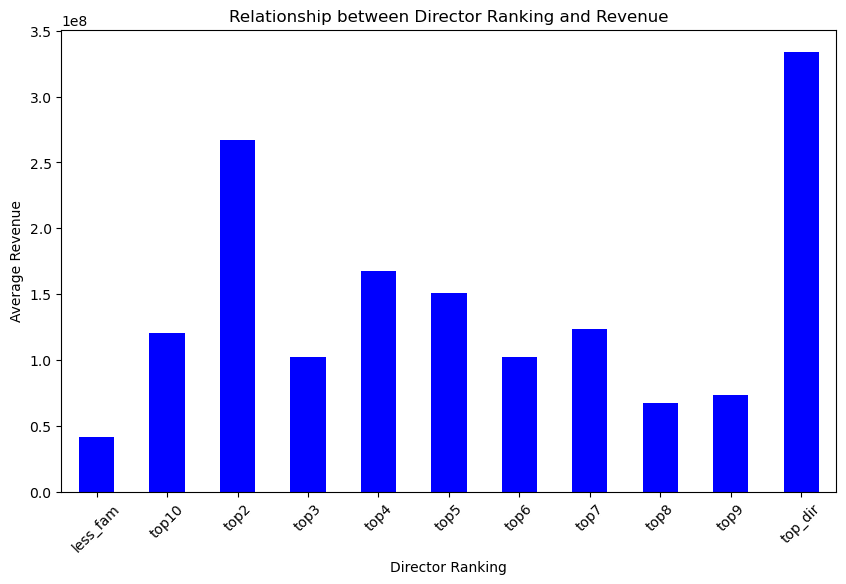

In [401]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
df = pd.DataFrame(newmovies)

# Group the data by the director ranking column and calculate the mean revenue for each group
grouped_data = df.groupby('dir_grp')['revenue'].median()

# Plot the average revenue for each director ranking group
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Director Ranking')
plt.ylabel('Average Revenue')
plt.title('Relationship between Director Ranking and Revenue')
plt.xticks(rotation=45)
plt.show()

In [402]:
newmovies.tail()

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
4779,27000,|Comedy,92.0,Clerks,3151130,Brian O'Halloran,Kevin Smith,1,0,0,0,0,0,0,0,top8,less_fam
4794,12000,|Horror|Comedy|Crime,93.0,Pink Flamingos,6000000,Divine,John Waters,1,0,0,0,1,0,0,0,less_fam,less_fam
4798,20000,|Crime|Horror|Mystery|Thriller,111.0,Cure,99000,Koji Yakusho,Kiyoshi Kurosawa,0,0,0,0,1,1,0,0,less_fam,less_fam
4802,7000,|Science Fiction|Drama|Thriller,77.0,Primer,424760,Shane Carruth,Shane Carruth,0,1,0,0,0,1,1,0,less_fam,less_fam
4804,220000,|Action|Crime|Thriller,81.0,El Mariachi,2040920,Carlos Gallardo,Robert Rodriguez,0,0,1,0,0,1,0,0,top6,less_fam


In [403]:
topactor1 = [
    'Robert Downey Jr.',
    'Dwayne Johnson',
    'Tom Cruise',
    'Chris Hemsworth',
    'Scarlett Johansson',
    'Vin Diesel',
    'Leonardo DiCaprio',
    'Chris Evans',
    'Johnny Depp',
    'Samuel L. Jackson'
]

topactor2 = [
    'Will Smith',
    'Tom Hanks',
    'Jennifer Lawrence',
    'Mark Wahlberg',
    'Harrison Ford',
    'Chris Pratt',
    'Brad Pitt',
    'Robert Pattinson',
    'Daniel Craig',
    'Sylvester Stallone'
]

topactor3 = [
    'Emma Stone',
    'Hugh Jackman',
    'Ryan Reynolds',
    'Angelina Jolie',
    'Ben Affleck',
    'Denzel Washington',
    'Matt Damon',
    'Charlize Theron',
    'Anne Hathaway',
    'Gal Gadot'
]

topactor4 = [
    'Bradley Cooper',
    'Christian Bale',
    'Ryan Gosling',
    'Robert De Niro',
    'Melissa McCarthy',
    'Will Ferrell',
    'Adam Sandler',
    'Chris Pine',
    'Eddie Murphy',
    'Jason Statham'
]

topactor5 = [
    'Keanu Reeves',
    'Jennifer Aniston',
    'Joaquin Phoenix',
    'Cameron Diaz',
    'Tom Hardy',
    'Sam Worthington',
    'Kevin Hart',
    'Zoe Saldana',
    'Natalie Portman',
    'Emily Blunt'
]

topactor6 = [
    'Bradley Cooper',
    'Owen Wilson',
    'Sandra Bullock',
    'Russell Crowe',
    'Steve Carell',
    'Anne Hathaway',
    'Amy Adams',
    'Dwayne Johnson',
    'Nicolas Cage',
    'Ben Stiller'
]

topactor7 = [
    'Matthew McConaughey',
    'John Cena',
    'Rebel Wilson',
    'Channing Tatum',
    'Jude Law',
    'Gerard Butler',
    'Michael B. Jordan',
    'Jason Bateman',
    'Hugh Jackman',
    'Eddie Redmayne'
]

topactor8 = [
    'Jamie Foxx',
    'Emma Watson',
    'Charlize Theron',
    'Jake Gyllenhaal',
    'John Krasinski',
    'Will Ferrell',
    'Jesse Eisenberg',
    'Zac Efron',
    'Idris Elba',
    'Jim Carrey'
]

topactor9 = [
    'Colin Farrell',
    'Adam Driver',
    'Kristen Stewart',
    'Tobey Maguire',
    'James McAvoy',
    'Matthew McConaughey',
    'Margot Robbie',
    'Keanu Reeves',
    'Kate Winslet',
    'Dakota Johnson'
]

topactor10 = [
    'Mila Kunis',
    'James Franco',
    'Ryan Reynolds',
    'Liam Hemsworth',
    'Blake Lively',
    'Halle Berry',
    'Javier Bardem',
    'Emily Blunt',
    'Benicio Del Toro',
    'Eva Mendes'
]

def convertActor1(eachrow):
    if eachrow in topactor1:
        return 'top_actr'
    if eachrow in topactor2:
        return 'top2'
    if eachrow in topactor3:
        return 'top3'
    if eachrow in topactor4:
        return 'top4'
    if eachrow in topactor5:
        return 'top5'
    if eachrow in topactor6:
        return 'top6'
    if eachrow in topactor7:
        return 'top7'
    if eachrow in topactor8:
        return 'top8'
    if eachrow in topactor9:
        return 'top9'
    if eachrow in topactor10:
        return 'top10'
    else:
        return 'less_fam'
    
    
newmovies['actr_grp'] = newmovies['actor1'].apply(convertActor1)

In [404]:
newmovies.describe(include='object')

,genres,title,actor1,director,dir_grp,actr_grp
count,3232,3232,3232,3232,3232,3232
unique,933,3228,1302,1458,11,11
top,|Drama,The Host,Bruce Willis,Steven Spielberg,less_fam,less_fam
freq,204,4,27,26,2509,2427


In [405]:
newmovies['actr_grp'].value_counts()

less_fam    2427
top2         132
top4         131
top_actr     127
top3         107
top6         103
top5          54
top8          54
top7          45
top9          31
top10         21
Name: actr_grp, dtype: int64

In [406]:
newmovies['actr_grp'].unique()

array(['top5', 'top_actr', 'top2', 'top4', 'less_fam', 'top9', 'top3',
       'top6', 'top10', 'top8', 'top7'], dtype=object)

In [407]:
df.groupby('actr_grp')['revenue'].median()

actr_grp
less_fam     41863726.0
top10        68572378.0
top2        164739174.0
top3        109676311.0
top4         83557872.0
top5         81862908.0
top6        100654149.0
top7         85412898.0
top8        102822902.0
top9        112343513.0
top_actr    155760117.0
Name: revenue, dtype: float64

In [606]:


# Assuming your dataset is stored in a DataFrame called 'df'


# Group the data by the director ranking column and calculate the mean revenue for each group
grouped_data = newmovies.groupby('actr_grp')['hit_list'].median()

# Plot the average revenue for each director ranking group
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Actor Ranking')
plt.ylabel('Average Revenue')
plt.title('Relationship between Actor Ranking and Revenue')
plt.xticks(rotation=45)
plt.show()

TypeError: could not convert string to float: 'Hit'

In [477]:
newmovies.head()
backup.head()
#[237000000,0,0,1,0,0,0,1,0,top_dir,top3]

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,2787965087,Sam Worthington,James Cameron,0,0,1,0,0,0,1,0,top_dir,top5
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,961000000,Johnny Depp,Gore Verbinski,0,0,1,0,0,0,0,0,top_dir,top_actr
2,245000000,|Action|Adventure|Crime,148.0,Spectre,880674609,Daniel Craig,Sam Mendes,0,0,1,0,0,0,0,0,top2,top2
3,250000000,|Action|Crime|Drama|Thriller,165.0,The Dark Knight Rises,1084939099,Christian Bale,Christopher Nolan,0,1,1,0,0,1,0,0,top_dir,top4
4,260000000,|Action|Adventure|Science Fiction,132.0,John Carter,284139100,Taylor Kitsch,Andrew Stanton,0,0,1,0,0,0,1,0,less_fam,less_fam


In [478]:
backup['recovery_rate'] = (backup['revenue']/backup['budget'])*100

In [479]:
backup.head()

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp,recovery_rate
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,2787965087,Sam Worthington,James Cameron,0,0,1,0,0,0,1,0,top_dir,top5,1176.356577
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,961000000,Johnny Depp,Gore Verbinski,0,0,1,0,0,0,0,0,top_dir,top_actr,320.333333
2,245000000,|Action|Adventure|Crime,148.0,Spectre,880674609,Daniel Craig,Sam Mendes,0,0,1,0,0,0,0,0,top2,top2,359.459024
3,250000000,|Action|Crime|Drama|Thriller,165.0,The Dark Knight Rises,1084939099,Christian Bale,Christopher Nolan,0,1,1,0,0,1,0,0,top_dir,top4,433.975640
4,260000000,|Action|Adventure|Science Fiction,132.0,John Carter,284139100,Taylor Kitsch,Andrew Stanton,0,0,1,0,0,0,1,0,less_fam,less_fam,109.284269


In [498]:
newmovies =  backup

In [621]:
def genHitList(row):
    if row<100:
        return 'Flop'
    elif 100<=row<=110:
        return 'Average'
    elif 110<row<=150:
        return 'Hit'
    else:
        return 'Block Buster'
newmovies['hit_list'] = newmovies['recovery_rate'].apply(genHitList)

In [622]:
newmovies.head()

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp,recovery_rate,hit_list
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,2787965087,Sam Worthington,James Cameron,0,0,1,0,0,0,1,0,top_dir,top5,1176.356577,Block Buster
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,961000000,Johnny Depp,Gore Verbinski,0,0,1,0,0,0,0,0,top_dir,top_actr,320.333333,Block Buster
2,245000000,|Action|Adventure|Crime,148.0,Spectre,880674609,Daniel Craig,Sam Mendes,0,0,1,0,0,0,0,0,top2,top2,359.459024,Block Buster
3,250000000,|Action|Crime|Drama|Thriller,165.0,The Dark Knight Rises,1084939099,Christian Bale,Christopher Nolan,0,1,1,0,0,1,0,0,top_dir,top4,433.975640,Block Buster
4,260000000,|Action|Adventure|Science Fiction,132.0,John Carter,284139100,Taylor Kitsch,Andrew Stanton,0,0,1,0,0,0,1,0,less_fam,less_fam,109.284269,Average


In [623]:
newdf = newmovies.drop(columns =['genres','actor1','director','title','recovery_rate'])

In [624]:
newdf.head(2)

,budget,runtime,revenue,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp,hit_list
0,237000000,162.0,2787965087,0,0,1,0,0,0,1,0,top_dir,top5,Block Buster
1,300000000,169.0,961000000,0,0,1,0,0,0,0,0,top_dir,top_actr,Block Buster


In [625]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(newdf['hit_list'])
newdf['list'] = le.transform(newdf['hit_list'])

In [626]:

#bb-1
#flop-2
#hit-3
#avg-0
#print(newdf['hit_list'].unique())

print(le.classes_)
newdf['list'].unique()
label = newdf['hit_list'].to_list()
encoded_labels = le.fit_transform(label)
original_values = le.classes_
#for label, value in zip(encoded_labels, label):
#    print(f"Encoded Label {label} corresponds to Original Value: {original_values[label]}")

['Average' 'Block Buster' 'Flop' 'Hit']


In [645]:
newdf.sample(20)
#bb-1
#avg-0
#hit-3
#flop2

,budget,runtime,revenue,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp,hit_list,list
3419,6800000,130.0,7103838,0,1,0,0,0,0,0,0,top3,less_fam,Average,0
356,90000000,128.0,524028679,0,0,1,0,0,0,0,0,top3,top_actr,Block Buster,1
934,50000000,86.0,69834815,1,0,0,0,0,0,0,1,less_fam,top4,Hit,3
2701,11000000,90.0,13196245,1,0,0,1,0,0,0,0,less_fam,less_fam,Hit,3
3187,9000000,79.0,4350774,1,0,0,0,0,0,0,0,less_fam,less_fam,Flop,2
3146,11000000,98.0,59827328,1,0,0,0,0,0,0,0,less_fam,less_fam,Block Buster,1
2193,20000000,124.0,60427839,0,1,0,0,0,1,0,0,less_fam,less_fam,Block Buster,1
225,120000000,135.0,93945766,0,0,1,0,0,0,1,1,top7,less_fam,Flop,2
2722,14000000,89.0,1755212,0,1,0,1,0,0,0,0,less_fam,less_fam,Flop,2
930,50000000,106.0,222809600,0,0,1,0,0,1,0,0,less_fam,less_fam,Block Buster,1


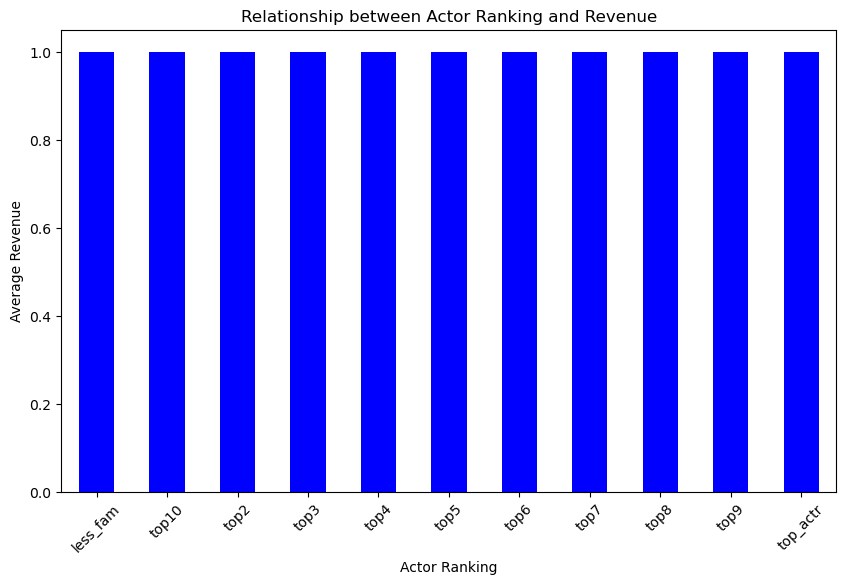

In [628]:


# Assuming your dataset is stored in a DataFrame called 'df'


# Group the data by the director ranking column and calculate the mean revenue for each group
grouped_data = newdf.groupby('actr_grp')['list'].median()

# Plot the average revenue for each director ranking group
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Actor Ranking')
plt.ylabel('Average Revenue')
plt.title('Relationship between Actor Ranking and Revenue')
plt.xticks(rotation=45)
plt.show()

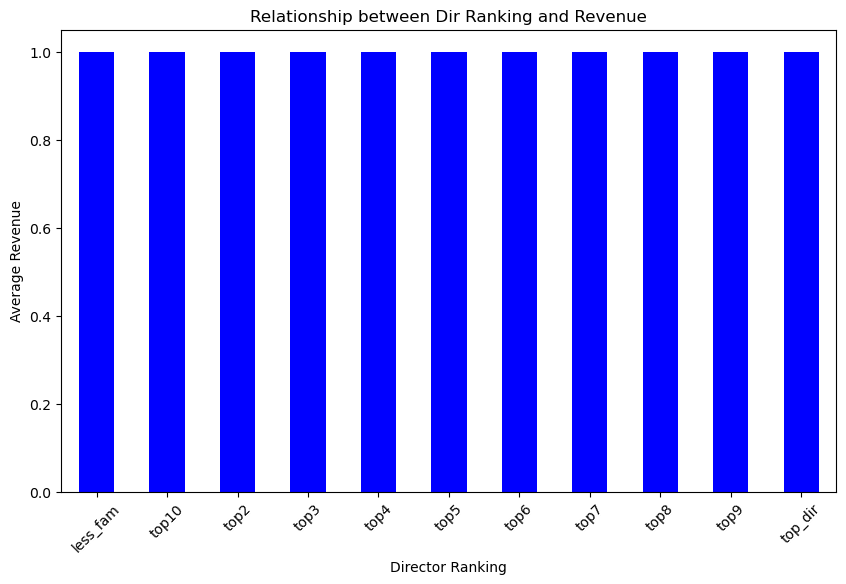

In [629]:
#bb-1:
#avg-0:
#hit-3:
#flop-2:

# Group the data by the director ranking column and calculate the mean revenue for each group
grouped_data = newdf.groupby('dir_grp')['list'].median()

# Plot the average revenue for each director ranking group
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Director Ranking')
plt.ylabel('Average Revenue')
plt.title('Relationship between Dir Ranking and Revenue')
plt.xticks(rotation=45)
plt.show()

In [642]:
#bb-1
#avg-0
#hit-3
#flop-2

# Assuming you have a DataFrame called 'data' containing the columns 'directors' and 'success_level'
# 'directors' column contains values like 'top1', 'top2', ..., 'top10'
# 'success_level' column contains values like 'hit', 'blockbuster', 'average', 'flop'

# Create a cross-tabulation table
cross_tab = pd.crosstab(newdf['dir_grp'], newdf['list'])

# Calculate the proportions within each group
group_proportions = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Print the cross-tabulation table and group proportions
print("Cross-Tabulation Table:")
print(cross_tab)
print("\nGroup Proportions:")
print(group_proportions)


Cross-Tabulation Table:
list       0     1    2    3
dir_grp                     
less_fam  58  1557  677  217
top10      0    34    9    3
top2       2    63   10    5
top3       4    65   13    8
top4       3    62    9    3
top5       0    49    7    2
top6       1    53   17    9
top7       2    54   16    3
top8       1    46   14    4
top9       0    38   11    3
top_dir    0    88    6    6

Group Proportions:
list             0         1         2         3
dir_grp                                         
less_fam  0.023117  0.620566  0.269829  0.086489
top10     0.000000  0.739130  0.195652  0.065217
top2      0.025000  0.787500  0.125000  0.062500
top3      0.044444  0.722222  0.144444  0.088889
top4      0.038961  0.805195  0.116883  0.038961
top5      0.000000  0.844828  0.120690  0.034483
top6      0.012500  0.662500  0.212500  0.112500
top7      0.026667  0.720000  0.213333  0.040000
top8      0.015385  0.707692  0.215385  0.061538
top9      0.000000  0.730769  0.211538  

In [631]:
newdf.corr()['list']

budget           -0.072141
runtime          -0.038727
revenue          -0.281108
comedy           -0.007084
drama             0.069143
action            0.019452
romance          -0.005246
horror           -0.046115
Thriller          0.035579
ScienceFiction    0.020922
family           -0.034482
list              1.000000
Name: list, dtype: float64

In [632]:
y=newdf[['list']]
y.head(2)

,list
0,1
1,1


In [633]:
x= newdf.drop(columns=['revenue','hit_list','list'])
x.head(2)

,budget,runtime,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
0,237000000,162.0,0,0,1,0,0,0,1,0,top_dir,top5
1,300000000,169.0,0,0,1,0,0,0,0,0,top_dir,top_actr


In [648]:
X = pd.get_dummies(x,columns=['dir_grp','actr_grp'])
X.head()

,budget,runtime,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,...,actr_grp_top10,actr_grp_top2,actr_grp_top3,actr_grp_top4,actr_grp_top5,actr_grp_top6,actr_grp_top7,actr_grp_top8,actr_grp_top9,actr_grp_top_actr
0,237000000,162.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,300000000,169.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,245000000,148.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,250000000,165.0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,260000000,132.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [662]:
from sklearn.model_selection import train_test_split

# Assuming you have a feature matrix X and a target variable y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train.head()
y_train.shape

(2585, 1)

In [663]:
x_train.head()

,budget,runtime,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
137,150000000,91.0,0,0,0,0,0,0,0,1,less_fam,less_fam
1608,25000000,104.0,0,0,0,0,0,0,0,0,less_fam,less_fam
2826,12000000,104.0,0,1,0,1,0,0,0,0,less_fam,top7
1000,50000000,100.0,1,0,0,0,0,0,0,0,less_fam,top6
2985,10000000,105.0,0,0,1,0,1,1,0,0,less_fam,less_fam


In [677]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [678]:
y_train.value_counts()

list
1       1695
2        611
3        219
0         60
dtype: int64

In [679]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
#clTran = make_column_transformer((OneHotEncoder(),['dir_grp','actr_grp']),(StandardScaler(),['budget','runtime']),remainder='passthrough')
pipe = make_pipeline(LogisticRegression())
#clTran

In [680]:
pipe.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('logisticregression', LogisticRegression())])

In [681]:
X_train.shape

(2585, 32)

In [682]:
X_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [683]:
predicted = pipe.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [684]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted)

NameError: name 'Y_test' is not defined

In [670]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define the column transformer
#clTran = make_column_transformer((OneHotEncoder(),['dir_grp','actr_grp']), remainder='passthrough')

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Support Vector Classifier', SVC()),
    ('Neural Network Classifier', MLPClassifier())
]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
# Iterate over the models and evaluate their performance
for model_name, model in models:
    pipe = make_pipeline( model)
    pipe.fit(x_train, y_train)
    predicted = pipe.predict(x_test)
    accuracy = accuracy_score(y_test, predicted)
   
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
   
    print(r2_score(y_test,predicted))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Logistic Regression:
Accuracy: 0.6398763523956723
-0.37997428855256254
Decision Tree Classifier:
Accuracy: 0.5224111282843895
-0.9622100157774793
Random Forest Classifier:
Accuracy: 0.6089644513137558
-0.4555893180622921


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier:
Accuracy: 0.6213292117465224
-0.43668556068485964


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classifier:
Accuracy: 0.6398763523956723
-0.37997428855256254


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Classifier:
Accuracy: 0.01854714064914992
-4.750522994214925


In [620]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Endline if classifiction

In [576]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,predicted)

-0.3757161860669731

In [426]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [307]:
cv = StratifiedKFold(n_splits=3)

In [308]:
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(

array([nan, nan, nan])

In [427]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

clTran = make_column_transformer((OneHotEncoder(), ['dir_grp', 'actr_grp']), remainder='passthrough')
pipe = make_pipeline(clTran, LinearRegression())

best_random_state = 0
best_r2_score = 0

for random_state in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
    pipe.fit(x_train, y_train)
    predicted = pipe.predict(x_test)
    r2 = r2_score(y_test, predicted)

    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best R2 Score:", best_r2_score)


Best Random State: 6
Best R2 Score: 0.5606513531586397


In [428]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Define the column transformer
clTran = make_column_transformer((OneHotEncoder(),['dir_grp','actr_grp']), remainder='passthrough')

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('Neural Network Regression', MLPRegressor())
]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
# Iterate over the models and evaluate their performance
for model_name, model in models:
    pipe = make_pipeline(clTran, model)
    pipe.fit(x_train, y_train)
    predicted = pipe.predict(x_test)
    r2 = r2_score(y_test, predicted)
    mae = mean_absolute_error(y_test, predicted)
    print(f"{model_name}:")
    print(f"R-squared score: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print()


Linear Regression:
R-squared score: 0.5606513531586397
Mean Absolute Error: 71832374.44109093

Decision Tree Regression:
R-squared score: 0.18464024351814579
Mean Absolute Error: 94396703.87248841



C:\Users\HP\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Random Forest Regression:
R-squared score: 0.50393780995648
Mean Absolute Error: 74023754.09212178



C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression:
R-squared score: 0.5431266371006793
Mean Absolute Error: 70722097.22652231



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression:
R-squared score: -0.09470710293498508
Mean Absolute Error: 98876050.40843888



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Regression:
R-squared score: 0.4900342136155491
Mean Absolute Error: 72396026.57902795



In [447]:
clTran = make_column_transformer((OneHotEncoder(),['dir_grp','actr_grp']), remainder='passthrough')
model = DecisionTreeRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
pipe = make_pipeline(clTran, model)
pipe.fit(x, y)
predicted = pipe.predict(x_test)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print("r2",r2)
print(f"err",mae)

r2 0.9979113774318922
err 721861.9714064915


In [430]:
x_test.head()

,budget,runtime,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
1004,50000000,97.0,0,0,1,0,0,1,1,0,less_fam,less_fam
2193,20000000,124.0,0,1,0,0,0,1,0,0,less_fam,less_fam
422,82000000,123.0,0,0,0,0,0,0,1,0,less_fam,less_fam
2688,14000000,109.0,0,1,0,1,0,0,0,0,less_fam,less_fam
4376,1000000,119.0,0,1,0,0,0,1,0,0,less_fam,less_fam


In [474]:
column_names = x_test.columns

input_data = [
    {'budget':237000000, 'runtime':162.0, 'comedy': 1,'drama': 0, 'action': 0, 'romance': 0,'horror':0,'Thriller':0,'ScienceFiction':1,'family':0,'dir_grp':'top2','actr_grp':'less_fam'} # Input values for data point 1
   # Input values for data point 2
    # Add more input data points as needed
]

input_df = pd.DataFrame(input_data, columns=column_names)

# Make predictions on the input data
predictions = pipe.predict(input_df)

# Print the predictions
print(predictions)


[4.19651413e+08]


In [432]:
newdf.tail()



,budget,runtime,revenue,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
4779,27000,92.0,3151130,1,0,0,0,0,0,0,0,top8,less_fam
4794,12000,93.0,6000000,1,0,0,0,1,0,0,0,less_fam,less_fam
4798,20000,111.0,99000,0,0,0,0,1,1,0,0,less_fam,less_fam
4802,7000,77.0,424760,0,1,0,0,0,1,1,0,less_fam,less_fam
4804,220000,81.0,2040920,0,0,1,0,0,1,0,0,top6,less_fam


In [457]:
backup.head()

,budget,genres,runtime,title,revenue,actor1,director,comedy,drama,action,romance,horror,Thriller,ScienceFiction,family,dir_grp,actr_grp
0,237000000,|Action|Adventure|Fantasy|Science Fiction,162.0,Avatar,2787965087,Sam Worthington,James Cameron,0,0,1,0,0,0,1,0,top_dir,top5
1,300000000,|Adventure|Fantasy|Action,169.0,Pirates of the Caribbean: At World's End,961000000,Johnny Depp,Gore Verbinski,0,0,1,0,0,0,0,0,top_dir,top_actr
2,245000000,|Action|Adventure|Crime,148.0,Spectre,880674609,Daniel Craig,Sam Mendes,0,0,1,0,0,0,0,0,top2,top2
3,250000000,|Action|Crime|Drama|Thriller,165.0,The Dark Knight Rises,1084939099,Christian Bale,Christopher Nolan,0,1,1,0,0,1,0,0,top_dir,top4
4,260000000,|Action|Adventure|Science Fiction,132.0,John Carter,284139100,Taylor Kitsch,Andrew Stanton,0,0,1,0,0,0,1,0,less_fam,less_fam
